# Introduction 

For the purpose of this project, the following questions will be explored:

What are typical wind conditions at Irish airports?

Airports that will be looked at in this project:

Dublin (DUB)

Shannon (SNN)

Cork (ORK)

Knock (NOC)


## Aquiring the datasets.

Import Libraries.

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read in the CSV Files for the four airports and name the dataframes accordingly. Skip Meta data using skiprows and format. Parse the first column as date and set it as the index. Format the date as well for readability.

In [249]:
# Load the Shannon airport dataset.

shannon = pd.read_csv("data/dly518.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%Y %H:%M')


In [250]:
# load the Dublin airport dataset.

dublin = pd.read_csv("data/dly532.csv", parse_dates=["date"], index_col='date', skiprows=25, low_memory=False, date_format='%d-%b-%Y %H:%M')

In [251]:
# Load the Cork airport dataset.

cork = pd.read_csv("data/dly3904.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%Y %H:%M')

In [252]:
# Load the Knock airport dataset.

knock = pd.read_csv("data/dly4935.csv", parse_dates=["date"], index_col='date', skiprows=24, low_memory=False, date_format='%d-%b-%Y %H:%M')

Check the datasets load correctly by checking the first few rows. 

In [253]:
shannon.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Sept-45,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,12.0,...,0,27,1.6,0,,1.6,2.3,,,
02-Sept-45,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,7.3,...,0,16,9.3,0,,2.5,3.5,,,
03-Sept-45,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,4.2,...,0,12,11.4,0,,2.9,3.9,,,
04-Sept-45,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,6.2,...,0,18,5.3,0,,2,2.7,,,
05-Sept-45,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,4.9,...,0,13,3.6,0,,1.8,2.4,,,


In [254]:
dublin.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-42,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
02-Jan-42,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
03-Jan-42,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
04-Jan-42,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
05-Jan-42,0,3.5,1,-0.8,0,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [255]:
cork.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-62,0,2.8,1,-2.5,,,8,,999.6,9.2,...,0,24,,0,,,,,,
02-Jan-62,0,2.8,1,-3.7,,,8,,1005.8,5.9,...,0,10,,0,,,,,,
03-Jan-62,0,2.3,1,-3.8,,,8,,1007.8,6.7,...,0,13,,0,,,,,,
04-Jan-62,0,6.6,0,0.6,,,8,,1007.8,4.5,...,0,12,,0,,,,,,
05-Jan-62,0,9.3,0,0.6,,,8,,1002.2,12.7,...,0,29,,0,,,,,,


In [256]:
knock.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Aug-96,4,,4,,,,8,,,,...,1,,1.1,0,,,,,,
02-Aug-96,0,15.1,0,9.2,,,0,0.3,999.2,7.7,...,0,18,,0,,,,,,
03-Aug-96,0,18,0,11.6,0,11.4,0,0,1002.1,6.6,...,0,18,5.7,0,15.6,2.7,3.7,2.7,2.7,2.7
04-Aug-96,0,20.4,0,9.6,0,8.6,0,0.1,991.7,11.3,...,0,32,6.8,0,15.975,3.7,5,6.2,6.2,6.3
05-Aug-96,0,13.7,0,8.7,0,10.9,0,13.3,983.8,7.8,...,0,24,0,0,14.625,1.1,1.8,0,-6.1,-5.9


## Cleaning the datasets.

Combine the four airport datasets into one Dataframe to create comparrison plots. Need to create a Column for the airport names to be stored. This can be acheived using pandas.concat. It will take the multiple dataframes and stick them together.

In [257]:
# Store the four airport DataFrames into a single DF. Adsd an Airport column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

all_airports = pd.concat([
    shannon.assign(Airport='Shannon'),
    dublin.assign(Airport='Dublin'),
    cork.assign(Airport='Cork'),
    knock.assign(Airport='Knock')
], axis=0)

# Move Airport column to front for readability.
# See: https://stackoverflow.com/questions/21415661/pandas-move-column-to-first-position-in-dataframe

all_airports = all_airports[['Airport'] + [c for c in all_airports.columns if c != 'Airport']]




# Check
all_airports.head()


,Airport,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,g_rad
date,,,,,,,,,,,,,,,,,,,,,
01-Sept-45,Shannon,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,...,27,1.6,0,,1.6,2.3,,,,NaN
02-Sept-45,Shannon,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,...,16,9.3,0,,2.5,3.5,,,,NaN
03-Sept-45,Shannon,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,...,12,11.4,0,,2.9,3.9,,,,NaN
04-Sept-45,Shannon,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,...,18,5.3,0,,2,2.7,,,,NaN
05-Sept-45,Shannon,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,...,13,3.6,0,,1.8,2.4,,,,NaN


Need to move the date column to match the rest of the columns.

In [258]:
# move date index to a column
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

all_airports = all_airports.reset_index()
all_airports.head()


,date,Airport,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,g_rad
0,01-Sept-45,Shannon,0,19.2,0,14.4,0,13.6,0,0.2,...,27,1.6,0,,1.6,2.3,,,,NaN
1,02-Sept-45,Shannon,0,20.7,0,14.8,0,13.4,3,0.0,...,16,9.3,0,,2.5,3.5,,,,NaN
2,03-Sept-45,Shannon,0,23.3,0,11.8,0,9.6,3,0.0,...,12,11.4,0,,2.9,3.9,,,,NaN
3,04-Sept-45,Shannon,0,21.6,0,9.4,0,6.7,3,0.0,...,18,5.3,0,,2,2.7,,,,NaN
4,05-Sept-45,Shannon,0,21.3,0,12.2,0,11.3,3,0.0,...,13,3.6,0,,1.8,2.4,,,,NaN


There is missing values in some of the columns. Replace these with NaN objects.

In [259]:
# Replace blank spaces with NaN values.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

all_airports.replace(to_replace=' ', value=np.nan, inplace=True)

# Check.

all_airports.head()


,date,Airport,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,g_rad
0,01-Sept-45,Shannon,0,19.2,0,14.4,0,13.6,0,0.2,...,27,1.6,0,NaN,1.6,2.3,NaN,NaN,NaN,NaN
1,02-Sept-45,Shannon,0,20.7,0,14.8,0,13.4,3,0.0,...,16,9.3,0,NaN,2.5,3.5,NaN,NaN,NaN,NaN
2,03-Sept-45,Shannon,0,23.3,0,11.8,0,9.6,3,0.0,...,12,11.4,0,NaN,2.9,3.9,NaN,NaN,NaN,NaN
3,04-Sept-45,Shannon,0,21.6,0,9.4,0,6.7,3,0.0,...,18,5.3,0,NaN,2,2.7,NaN,NaN,NaN,NaN
4,05-Sept-45,Shannon,0,21.3,0,12.2,0,11.3,3,0.0,...,13,3.6,0,NaN,1.8,2.4,NaN,NaN,NaN,NaN


For the purpose of this project, will be looking at the following columns for analysis.

__Airport - Location of Airport__

__Date - Date data recorded.__

__'wdsp:'   -  Mean Wind Speed (knot)__

__'hm:'    -  Highest ten minute mean wind speed (knot)__

__'ddhm:'   -  Wind Direction at max 10 min. mean (deg)__

__'hg: '   -  Highest Gust (knot)__

First, drop any rows that are missing values.

In [260]:
# Drop rows missing values in 'wdsp' column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

mean_wind_speed = all_airports[['wdsp']].copy()
mean_wind_speed.isna().sum()
mean_wind_speed.dropna(inplace=True)

# Check.
mean_wind_speed.head()


,wdsp
0,12.0
1,7.3
2,4.2
3,6.2
4,4.9


In [261]:
# Drop rows missing values in 'hm' column.

max_wind_speed = all_airports[['hm']].copy()
max_wind_speed.isna().sum()
max_wind_speed.dropna(inplace=True)

# Check.
max_wind_speed.head()


,hm
0,20
1,12
2,8
3,13
4,9


In [262]:
# Drop rows missing values in 'ddhm' column.

mean_wind_direction = all_airports[['ddhm']].copy()
mean_wind_direction.isna().sum()
mean_wind_direction.dropna(inplace=True)

# Check.
mean_wind_direction.head()


,ddhm
0,90
1,100
2,100
3,310
4,100


In [263]:
# Drop rows missing values in 'hg' column.

max_gust_speed = all_airports[['hg']].copy()
max_gust_speed.isna().sum()
max_gust_speed.dropna(inplace=True)

# Check.
max_gust_speed.head()

,hg
0,27
1,16
2,12
3,18
4,13


Drop the unwanted columns and rename the ones being kept to improve readability.

In [264]:
# drop unwanted columns and rename them.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

all_airports = all_airports[['date', 'Airport','wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
  'date': 'Date',
  'wdsp': 'Mean_Wind_Speed(knots)', 
  'hm': 'Max_Wind_Speed(knots)', 
  'ddhm': 'Mean_Wind_Direction(degrees)', 
  'hg': 'Max_Gust_Speed(knots)'})   

# Check.
all_airports.head()

,Date,Airport,Mean_Wind_Speed(knots),Max_Wind_Speed(knots),Mean_Wind_Direction(degrees),Max_Gust_Speed(knots)
0,01-Sept-45,Shannon,12.0,20,90,27
1,02-Sept-45,Shannon,7.3,12,100,16
2,03-Sept-45,Shannon,4.2,8,100,12
3,04-Sept-45,Shannon,6.2,13,310,18
4,05-Sept-45,Shannon,4.9,9,100,13


## Investigating / Analysising Data

Wind Speed Distribution by Airport



Box Plot will show how typical wind conditions differ between airports.


#
Interpretation

Median differences

Variability

Outliers (storm days)

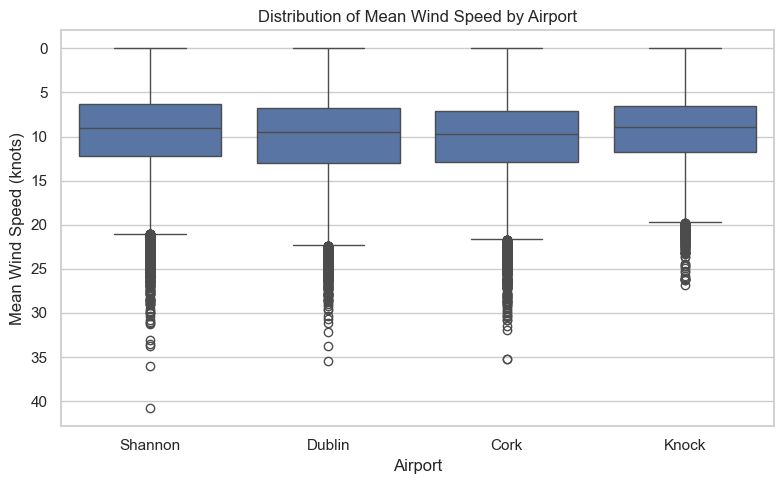

In [265]:
# Boxplot of Mean Wind Speed by Airport
# See: https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=all_airports,
    x='Airport',
    y='Mean_Wind_Speed(knots)'
)

plt.title('Distribution of Mean Wind Speed by Airport')
plt.xlabel('Airport')
plt.ylabel('Mean Wind Speed (knots)')
plt.tight_layout()

# plt.savefig('mean_wind_speed_boxplot.png', dpi=300)

plt.show()


Analysis----------

Extreme Wind & Gust Comparison (Operational risk)
Why

Aviation risk is driven by extremes, not averages.


Violin plot of max gust speed by airport.

Thickness shows frequency

Long tails = more extreme events

Easy airport comparison

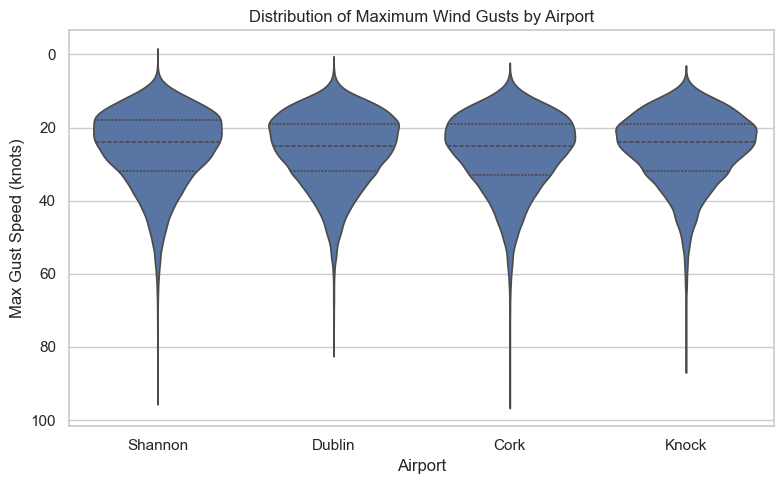

In [266]:
plt.figure(figsize=(8, 5))

sns.violinplot(
    data=all_airports,
    x='Airport',
    y='Max_Gust_Speed(knots)',
    inner='quartile'
)

plt.title('Distribution of Maximum Wind Gusts by Airport')
plt.xlabel('Airport')
plt.ylabel('Max Gust Speed (knots)')
plt.tight_layout()

# plt.savefig('max_gust_speed_violinplot.png', dpi=300)

plt.show()


 analysis -------

Seasonal Wind Speed Trends (Climatology)
Why

Seasonality is central to wind behaviour in Ireland.

Graph

Monthly mean wind speed by airport.

C:\Users\laura\AppData\Local\Temp\ipykernel_22396\1866044137.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_airports['Date'] = pd.to_datetime(all_airports['Date'], errors='coerce', dayfirst=True)


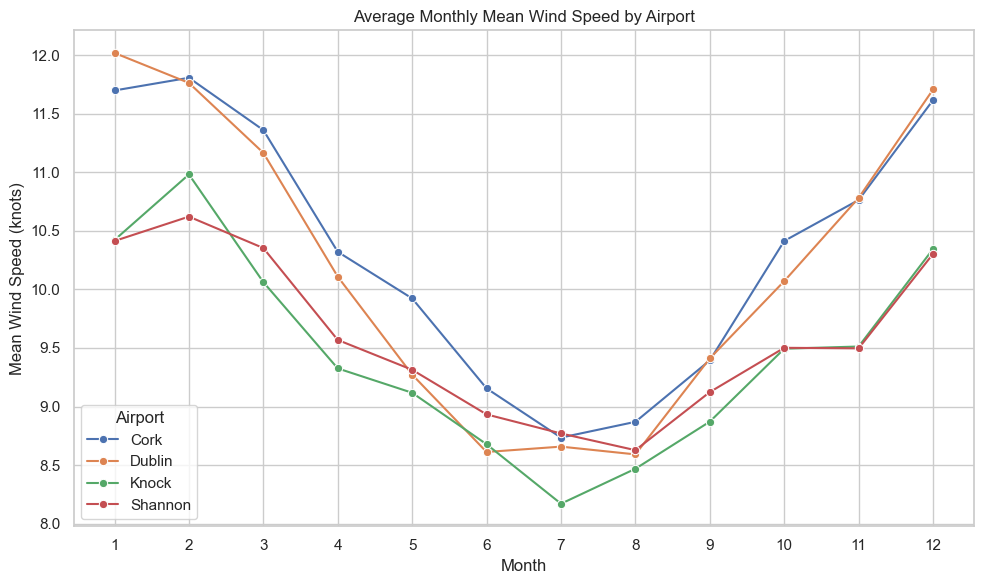

In [267]:
# Ensure Date column is datetime
all_airports['Date'] = pd.to_datetime(all_airports['Date'], errors='coerce', dayfirst=True)

# Extract month
all_airports['Month'] = all_airports['Date'].dt.month

# Convert wind speed to numeric for aggregation
all_airports['Mean_Wind_Speed(knots)'] = pd.to_numeric(all_airports['Mean_Wind_Speed(knots)'], errors='coerce')

monthly = (
    all_airports
    .groupby(['Airport', 'Month'])['Mean_Wind_Speed(knots)']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=monthly,
    x='Month',
    y='Mean_Wind_Speed(knots)',
    hue='Airport',
    marker='o'
)

plt.title('Average Monthly Mean Wind Speed by Airport')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (knots)')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


Analysis 

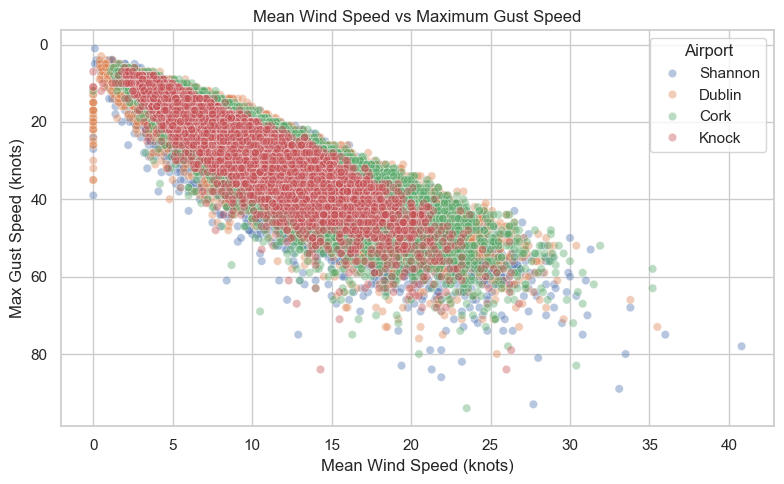

In [351]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=all_airports,
    x='Mean_Wind_Speed(knots)',
    y='Max_Gust_Speed(knots)',
    hue='Airport',
    alpha=0.4
)



plt.title('Mean Wind Speed vs Maximum Gust Speed')
plt.xlabel('Mean Wind Speed (knots)')
plt.ylabel('Max Gust Speed (knots)')
plt.tight_layout()
plt.show()


Windrose documentation

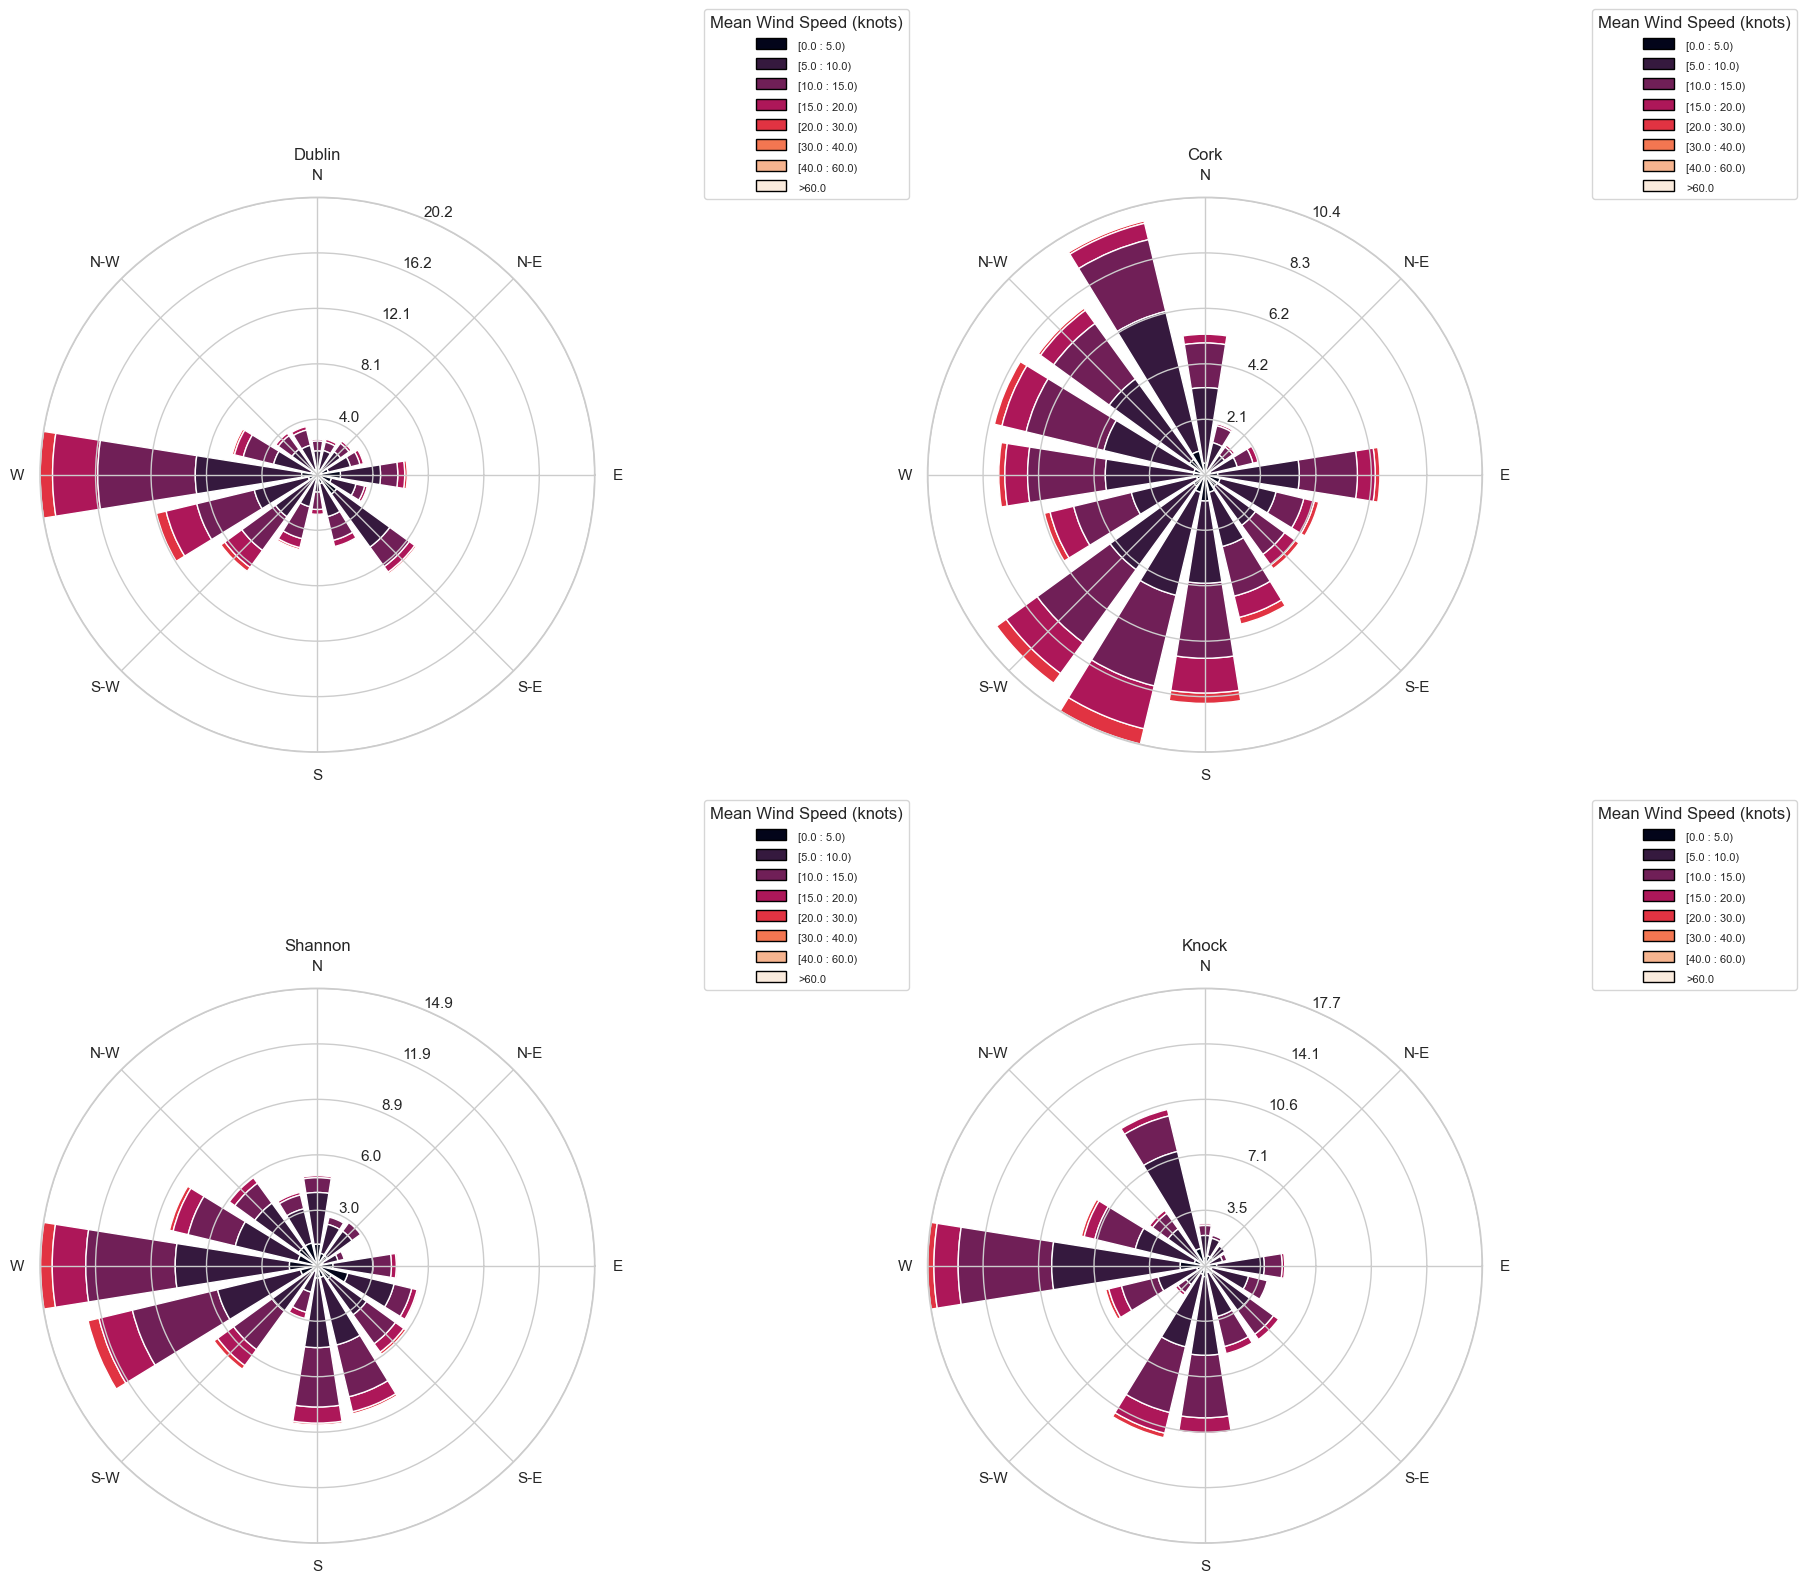

In [ ]:
# Wind Rose Plots for Wind Direction and Mean Wind Speed
# See: 


fig = plt.figure(figsize=(18, 16))

airports = ['Dublin', 'Cork', 'Shannon', 'Knock']

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # ensure numeric types and drop invalid rows
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Mean_Wind_Speed(knots)'], errors='coerce')

    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Mean Wind Speed (knots)")
    # move legend outside plot
    # See: https://matplotlib.org/stable/gallery/axes_grid1/windrose_legend_outside.html
    ax.set_legend(title="Mean Wind Speed (knots)", bbox_to_anchor=(1.2, 1))

# plt.savefig('Wind_Rose_Wind_Direction.png')

plt.tight_layout()
plt.show()


__Analysis of Mean Wind Direction(degrees) for Shannon, Dublin, Cork and Knock:__

Cork appears to have a	Strong peak around 220°–240° (southwest winds dominate).

Dublin looks to have strong influence from west winds 

Knock	is	More evenly spread, but slight peak near 180° (southerly winds).

Shannon	 is Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

__Pairplot of All Airports__

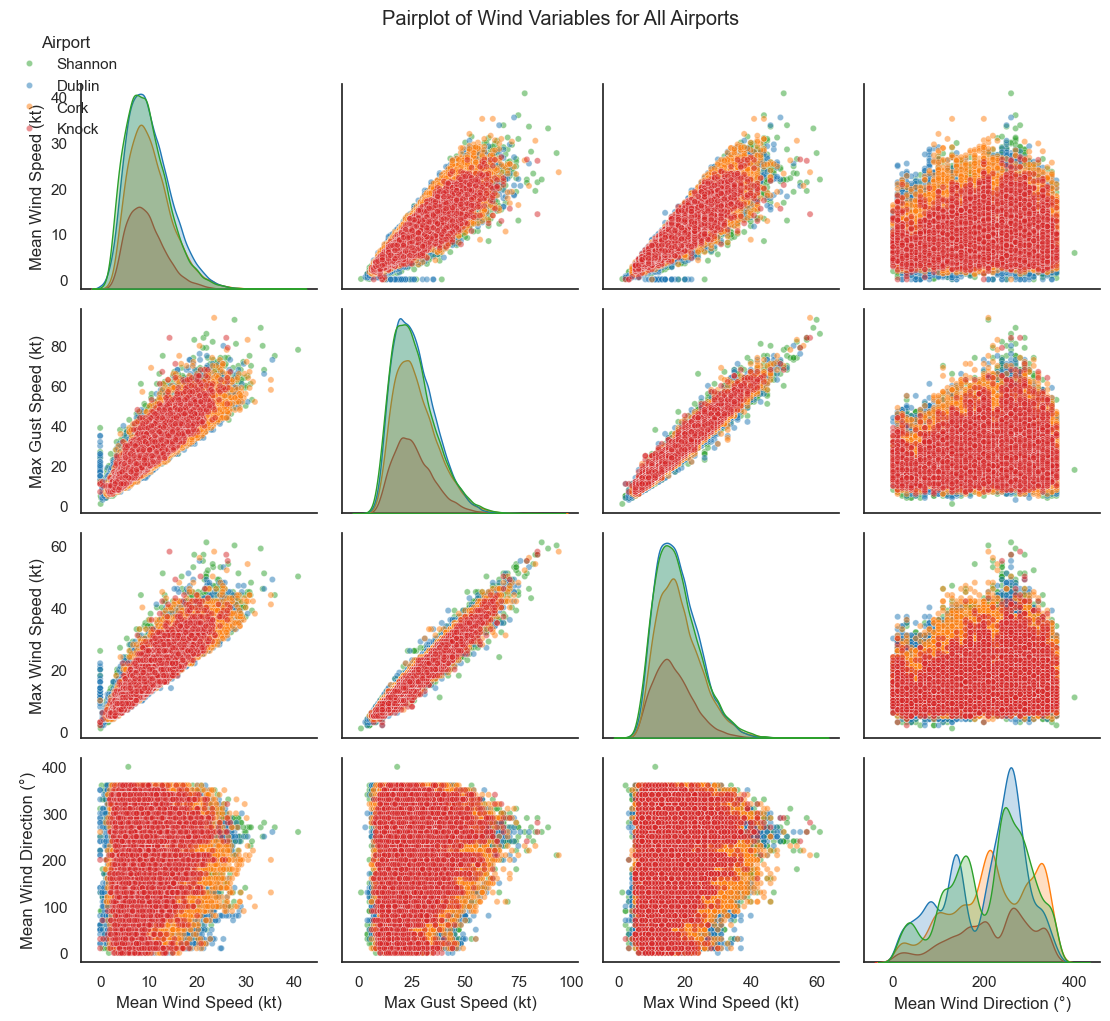

In [ ]:
# Generate a pairplot for all the variables for all the airports

# Prepare data: select relevant columns and drop rows with missing values
pairplot_data = all_airports.dropna(subset=numeric_cols + ['Airport']).copy()

# Convert columns to numeric for plotting
for col in numeric_cols:
    pairplot_data[col] = pd.to_numeric(pairplot_data[col], errors='coerce')

# Rename columns for nicer labels in the plot
pairplot_data = pairplot_data.rename(columns=label_map)

# Only keep rows with all numeric variables present
pairplot_data = pairplot_data.dropna(subset=label_map.values())

pairplot = sns.pairplot(
    pairplot_data,
    vars=pairplot_vars,
    hue='Airport',
    palette=palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 's': 20}
)


# Move legend to top right
pairplot._legend.set_bbox_to_anchor((1, 1))
pairplot._legend.set_title('Airport')


plt.suptitle("Pairplot of Wind Variables for Cork, Shannon, Dublin and Knock Airport", y=1.02)
plt.tight_layout()

plt.show()

Histogram 

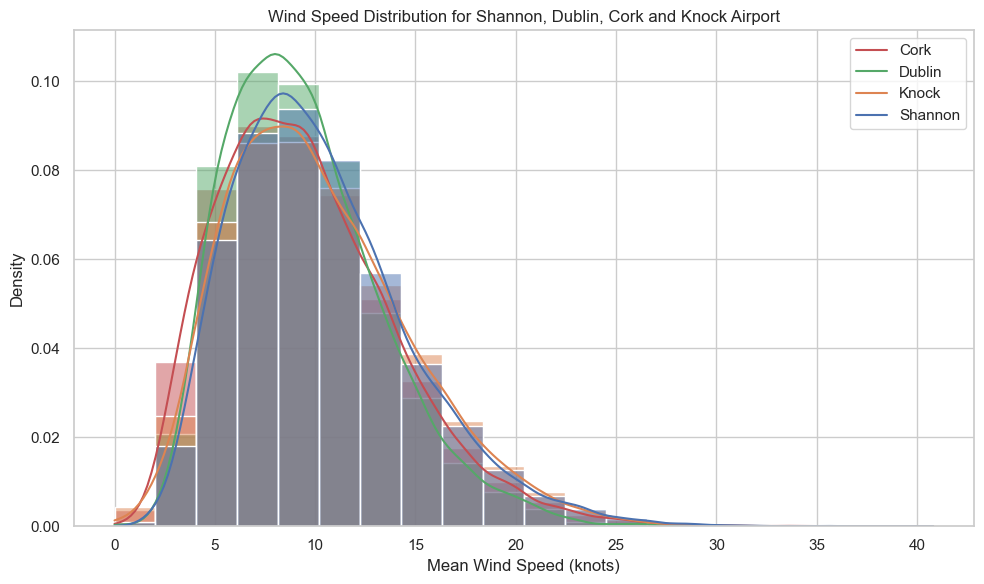

In [ ]:
# Plot Histogram of Mean Wind Speed for All Airports

# add
 

wind_speeds = all_airports.pivot(columns='Airport', values='Mean_Wind_Speed(knots)')


plt.figure(figsize=(10, 6))
sns.histplot(data=wind_speeds, bins=20, kde=True, stat="density", common_norm=False)
plt.title('Wind Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Mean Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Speed_Distribution_All_Airports.png')

plt.show()

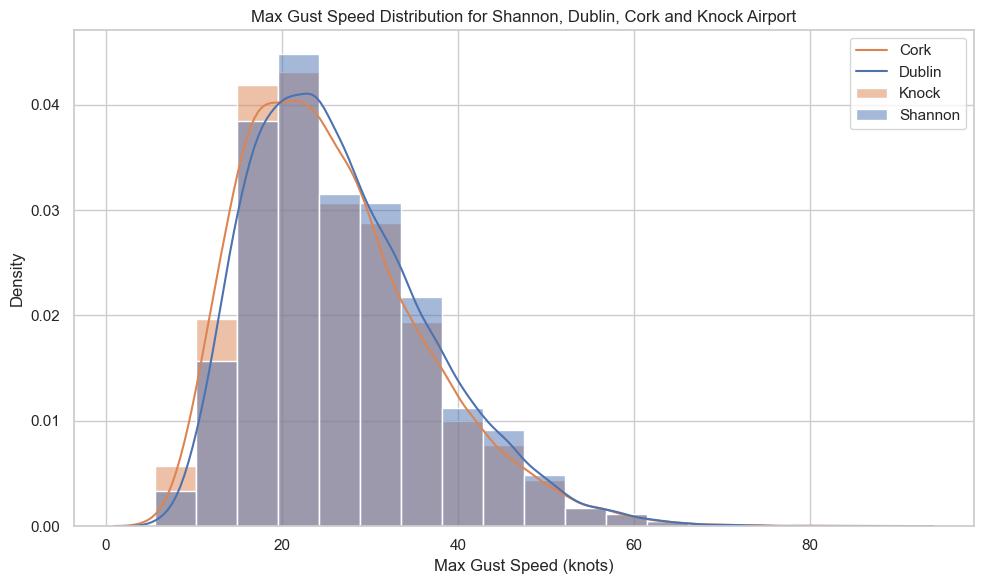

In [ ]:
# Plot histogram of Max Gust Speed for All Airports

max_gust_speeds = all_airports.pivot(columns='Airport', values='Max_Gust_Speed(knots)')
plt.figure(figsize=(10, 6))
sns.histplot(data=max_gust_speeds, bins=20, kde=True, stat="density", common_norm=False)


plt.title('Max Gust Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Max Gust Speed (knots)')
plt.ylabel('Density')
plt.legend(max_gust_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Gust_Speed_Distribution_All_Airports.png')

plt.show()


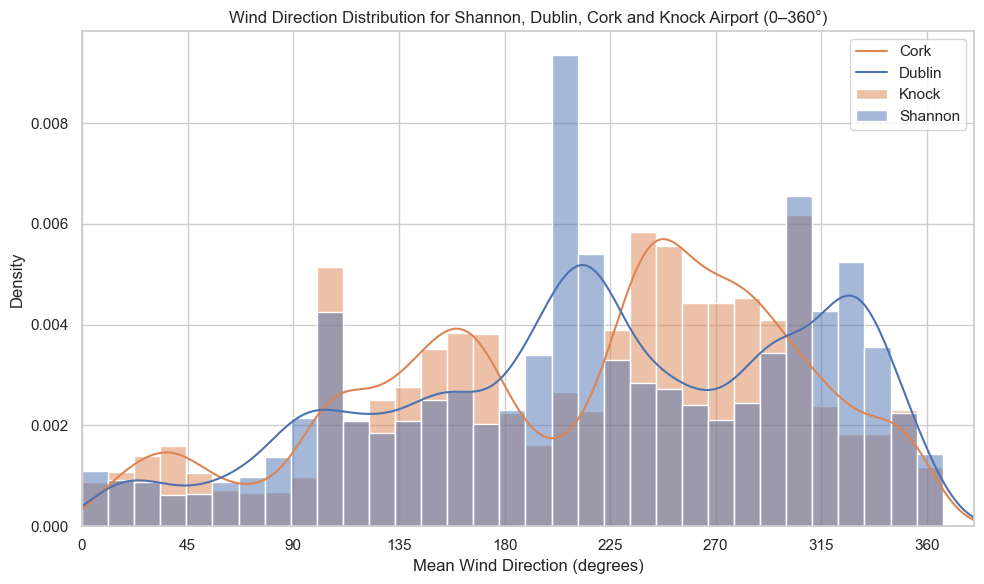

In [ ]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(columns='Airport', values='Mean_Wind_Direction(degrees)')

plt.figure(figsize=(10, 6))
sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)
plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


An


Airport	Color	Observations
Cork	Orange	Strong peak around 220°–240° (southwest winds dominate).
Dublin	Blue	Broad distribution, but notable density around 200°–240°.
Knock	Black	More evenly spread, but slight peak near 180° (southerly winds).
Shannon	Gray	Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

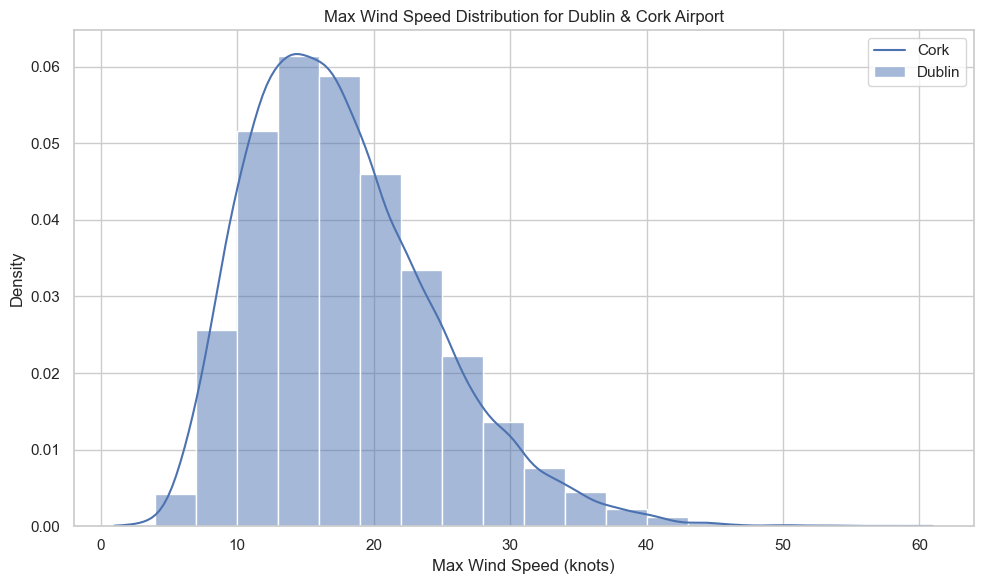

In [ ]:
# Plot histogram of Max Wind Speed for cork and Dublin Airport

max_wind_speeds = all_airports.pivot(columns='Airport', values='Max_Wind_Speed(knots)')

plt.figure(figsize=(10, 6))
sns.histplot(data=max_wind_speeds, bins=20, kde=True, stat="density", common_norm=False)

plt.title('Max Wind Speed Distribution for Dublin & Cork Airport') 
plt.xlabel('Max Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(max_wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Wind_Speed_Distribution_Dublin_Cork_Airports.png')

plt.show()

__Analysis of Max Wind Speed for Cork and Dublin:__

Both Cork and Dublin airport show their highest density between 10 and 20 knots, with both their modal wind speed being around 14-16 knots. This would suggest that the typical maximun daily wind speeds are generally moderate at both locations. The distributionsa re positively skewed, most days see moderate winds and a samll amount of days see high wind days. 

Cork experiences more extreme wind events, they extend beyond 40-50 knots and while Dublin also experiences some extremes they are usually below 30-35 knots. It would be fair to say that Cork Airport is more exposed to severe wind events, and this is more than likely due to its position on the West of Ireland, close to the Atlantic Ocean. Cross winds of 35-40 knots may opertational risks of delays or cancelations of flights more likely to happen at Cork Airport rather than Dublin Airport, but almost only on days with extreme wind conditions.


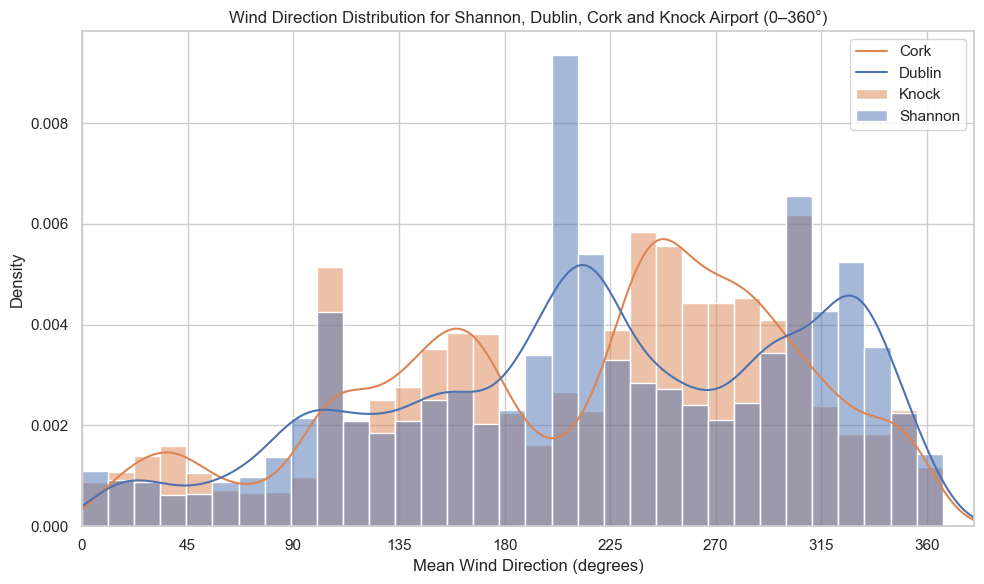

In [ ]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(columns='Airport', values='Mean_Wind_Direction(degrees)')

plt.figure(figsize=(10, 6))
sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)
plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


Histogram doesnt give good insight for 360 degrees win d direction data - look at windrose

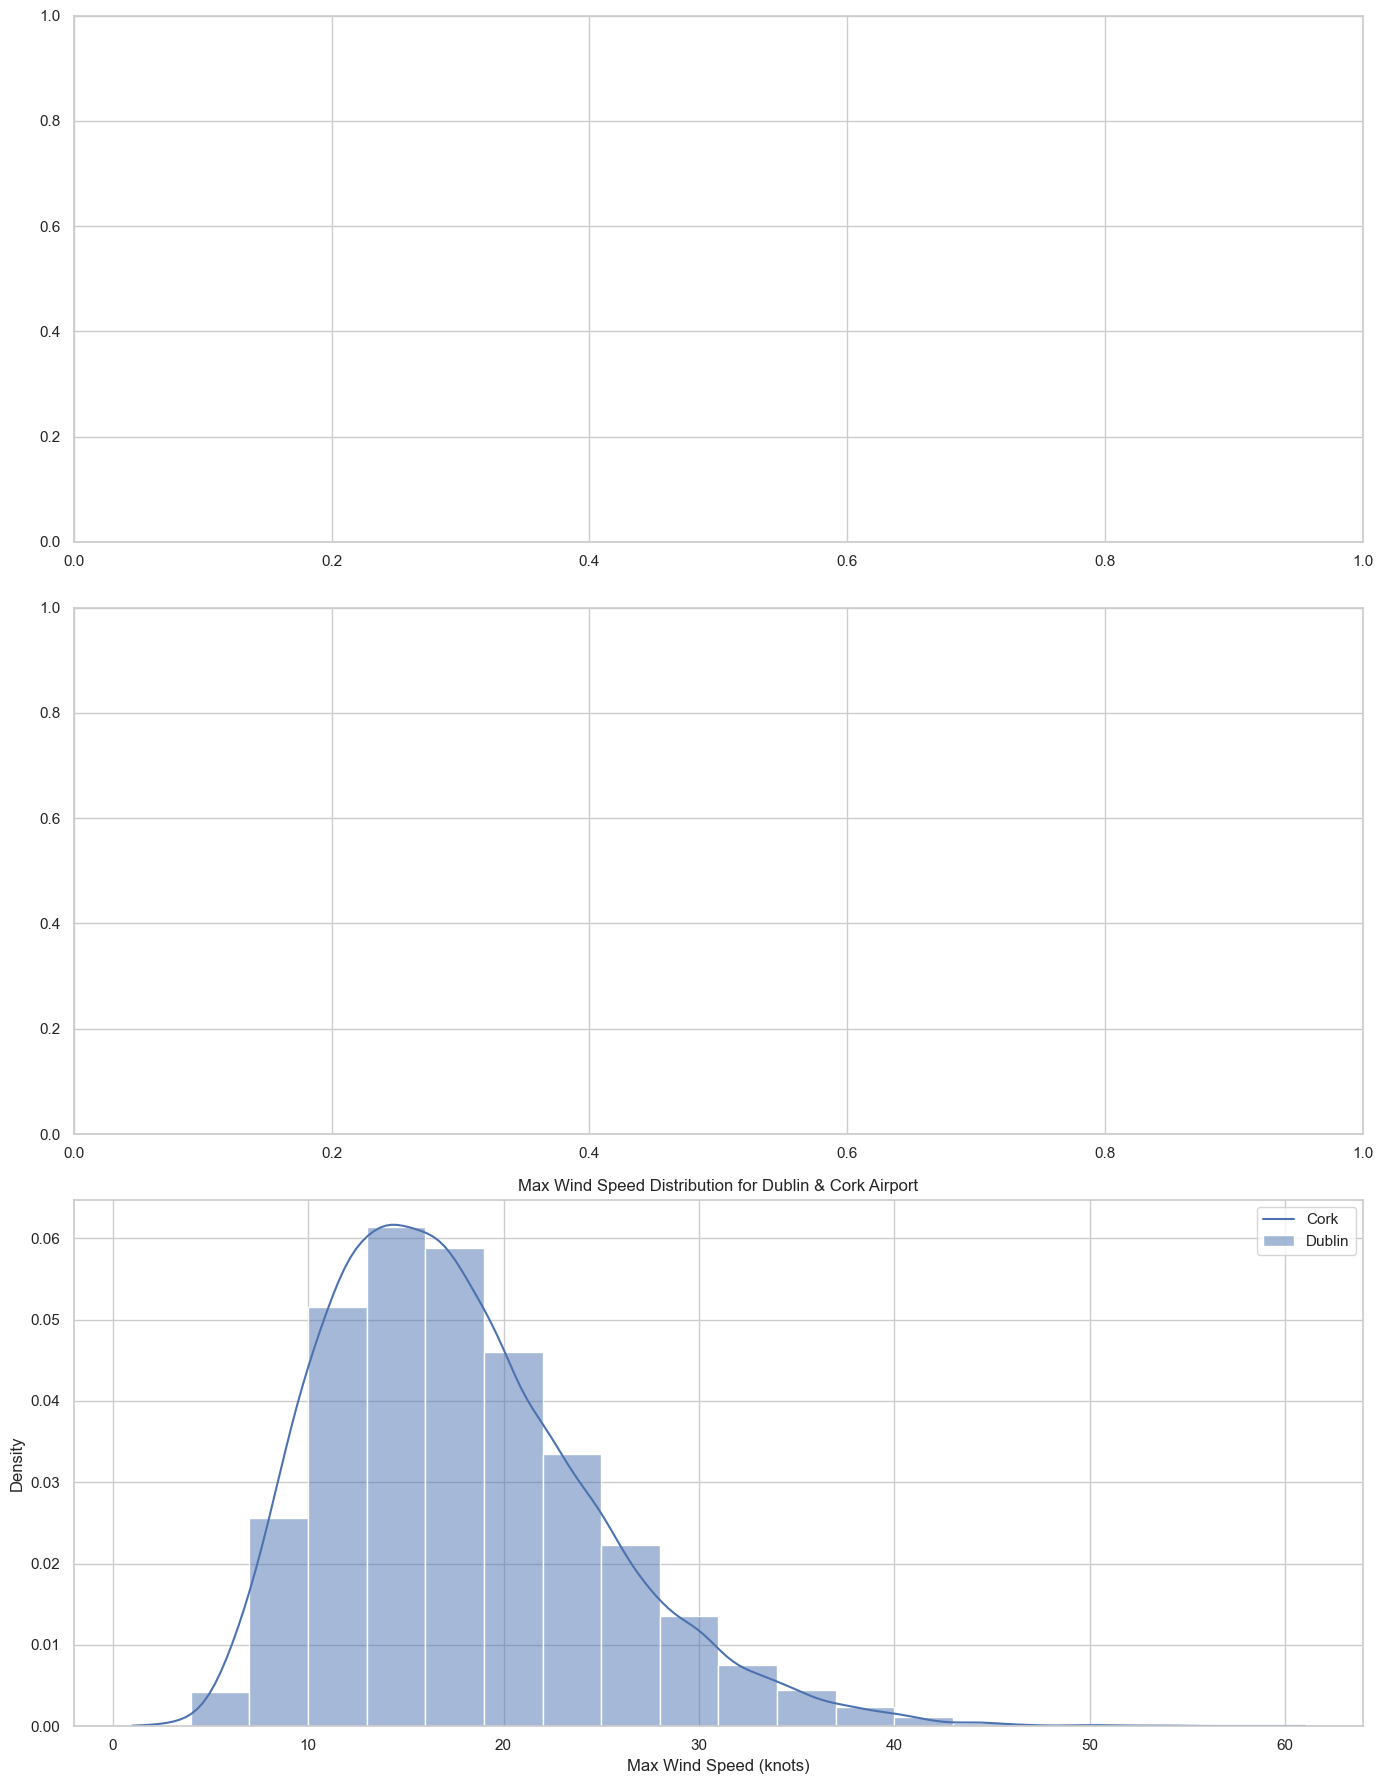

In [ ]:

# Apply a clean seaborn theme
sns.set_theme(style="whitegrid")


# Consistent colour palette for all plots
palette = sns.color_palette("Set2", n_colors=len(wind_speeds.columns))

# Create combined figure
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=False)

max_wind_speeds = all_airports.pivot(columns='Airport', values='Max_Wind_Speed(knots)')


sns.histplot(data=max_wind_speeds, bins=20, kde=True, stat="density", common_norm=False)

plt.title('Max Wind Speed Distribution for Dublin & Cork Airport') 
plt.xlabel('Max Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(max_wind_speeds.columns)
plt.tight_layout()


Windrose documentation

https://python-windrose.github.io/windrose/usage-output.html

__Analysis of Mean Wind Direction(degrees) for Shannon, Dublin, Cork and Knock:__

Cork appears to have a	Strong peak around 220°–240° (southwest winds dominate).

Dublin looks to have strong influence from west winds 

Knock	is	More evenly spread, but slight peak near 180° (southerly winds).

Shannon	 is Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

Windrose documentation

https://python-windrose.github.io/windrose/usage-output.html

C:\Users\laura\AppData\Local\Temp\ipykernel_22396\132792426.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


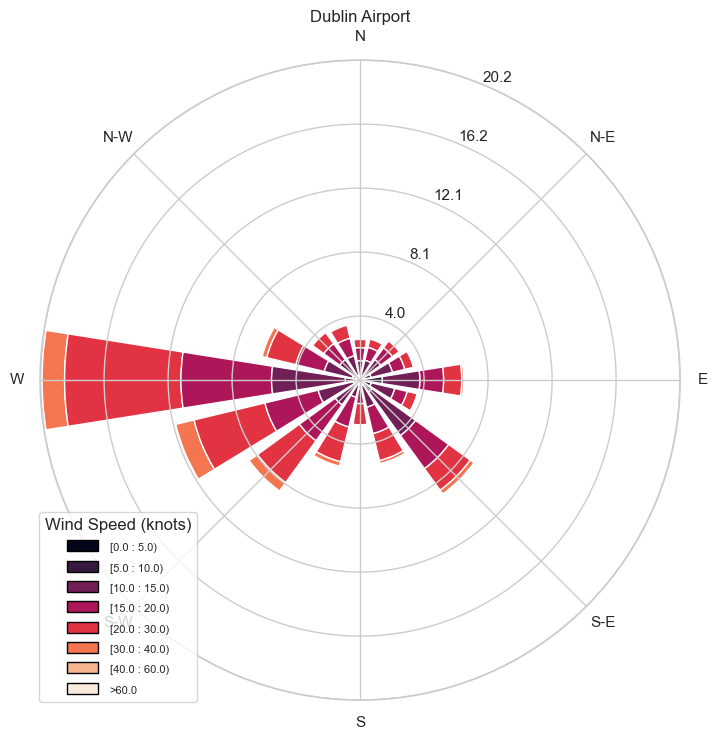

In [ ]:
from windrose import WindroseAxes

# Create Wind Rose for Dublin Airport


dublin = all_airports[all_airports['Airport'] == 'Dublin'].copy()

# Filter for one airport and make a copy
dublin = all_airports[all_airports['Airport'] == 'Dublin'].copy()

# Convert to numeric (coerce invalid strings to NaN) and drop missing values
directions = pd.to_numeric(dublin['Mean_Wind_Direction(degrees)'], )
speeds = pd.to_numeric(dublin['Max_Wind_Speed(knots)'], )

mask = directions.notna() & speeds.notna()
directions = directions[mask].astype(float) % 360  # ensure numeric and 0-360 range
speeds = speeds[mask].astype(float)

fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(
    directions,
    speeds,
    normed=True,
    opening=0.8,
    edgecolor='white',
    bins=[0, 5, 10, 15, 20, 30, 40, 60]
)

ax.set_title("Dublin Airport")
ax.set_legend(title="Wind Speed (knots)")

plt.tight_layout()

# plt.savefig('Wind_Rose_Dublin_Airport.png')

plt.show()


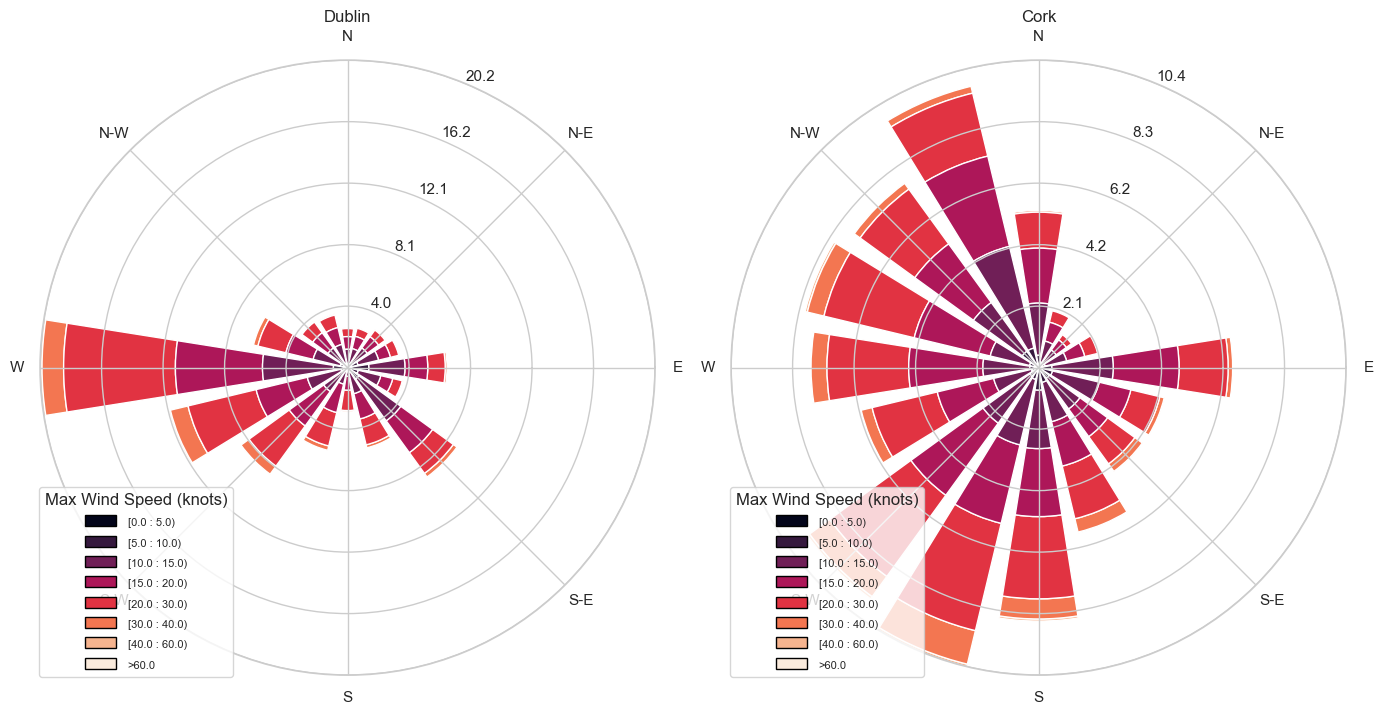

In [ ]:
fig = plt.figure(figsize=(14, 7))

airports = ['Dublin', 'Cork']

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(1, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # ensure numeric types and drop invalid rows
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Wind_Speed(knots)'], errors='coerce')

    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Max Wind Speed (knots)")

# plt.savefig('Wind_Rose_Wind_Direction_Dublin_Cork_Airports.png')

plt.tight_layout()
plt.show()


__Dublin Airport/Cork Airport Wind Direction vs Max Wind Speed Analysis:__ 

Looking at this Windrose, its clear to see Dublin Airport shows a strong dominance of west and south west winds. The higher Knot speeds can be associated with the Atlantic airflow coming from the west.

Cork Airport shows a range of different directions and a much greater freaquency of strong winds coming in from the southwest, highlighting the exposure to the Atlantic Coast.


lets looks at seasonal data - look at code here - not loading thinking linked to month not parse correctly 

In [ ]:
# Filter for months and seasons



def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


In [ ]:
# Plot windrose by season

def plot_windrose_by_season(airport_name):
    airport_data = all_airports[all_airports['Airport'] == airport_name].copy()
    
    # Add month and season columns
    airport_data['month'] = airport_data.index.month
    airport_data['season'] = airport_data['month'].apply(get_season)
    
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    
    fig = plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(seasons, 1):
        ax = fig.add_subplot(2, 2, i, projection='windrose')
        season_data = airport_data[airport_data['season'] == season]
        
        directions = pd.to_numeric(season_data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
        speeds = pd.to_numeric(season_data['Max_Wind_Speed(knots)'], errors='coerce')
        
        mask = directions.notna() & speeds.notna()
        if not mask.any():
            ax.set_title(f"{season} (no valid data)")
            continue
        
        ax.bar(
            directions[mask],
            speeds[mask],
            bins=[0, 5, 10, 15, 20, 30, 40, 60],
            normed=True,
            opening=0.8,
            edgecolor='white'
        )
        
        ax.set_title(f"{season}")
        ax.set_legend(title="Wind Speed (knots)")
    
    plt.suptitle(f"Wind Rose by Season – {airport_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


    

In [ ]:
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

def plot_windrose_by_season(all_airports, airport_name):
    ax = WindroseAxes.from_ax()
    ax.bar(
        data['Mean_Wind_Direction(degrees)'],
        data['Max_Wind_Speed(knots)'],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_title(f"{airport_name} - {seasons}")
    ax.set_legend(title="Wind Speed (knots)")
    plt.tight_layout()
    plt.show()
